In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data collection and processing


In [2]:
car_dataset = pd.read_csv('car_dataset.csv')

In [3]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
car_dataset.shape

(4340, 8)

In [9]:
# Getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [13]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


# Applying the solutions

In [17]:
# Extract the Brand as it's a huge price divider
car_dataset['brand'] = car_dataset['name'].str.split(' ').str[0]

# Convert 'year' to 'car_age' - simpler for the model to process
car_dataset['car_age'] = 2026 - car_dataset['year']

In [20]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,19
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,19
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,14
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,9
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,12


# One hot encoding the catgorical data

In [25]:
# Use a Log Transformation to handle price skewness instead of manual scaling
y = np.log1p(car_dataset['selling_price'])

# Drop columns used for engineering and the original target
x = car_dataset.drop(['name', 'year', 'selling_price'], axis=1)

# Automatically converts categorical text to binary numbers
x = pd.get_dummies(x, drop_first=True)

In [27]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,19
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,19
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,14
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,9
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,12


In [29]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

# Model Training: Random Forest


In [32]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
train_prediction = model.predict(x_train)
print(f"R squared error for training dataset: {metrics.r2_score(y_train, train_prediction):.4f}")

R squared error for training dataset: 0.9585


In [40]:
test_prediction = model.predict(x_test)
print(f"R squared error for testing dataset: {metrics.r2_score(y_test, test_prediction):.4f}")

R squared error for testing dataset: 0.8226


# visualize the actual price and the predicted prices

<function matplotlib.pyplot.show(close=None, block=None)>

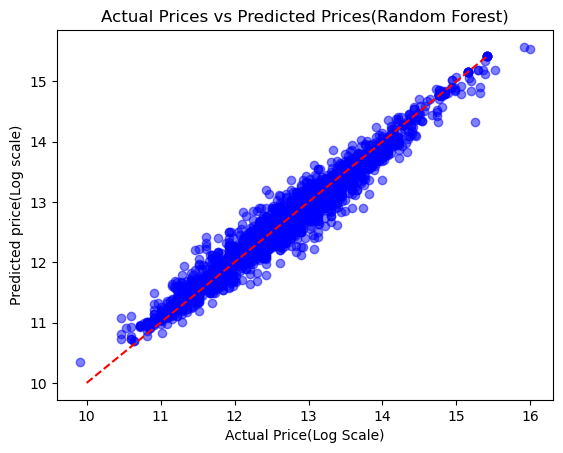

In [46]:
plt.scatter(y_train,train_prediction, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price(Log Scale)")
plt.ylabel("Predicted price(Log scale)")
plt.title("Actual Prices vs Predicted Prices(Random Forest)")
plt.show